In [5]:
week_fp_base = 'nfl-big-data-bowl-2021/week{}.csv'
week_fp = week_fp_base.format(1)
play_fp = 'nfl-big-data-bowl-2021/plays.csv'

In [6]:
import pandas as pd
import numpy as np

week_data = pd.read_csv(week_fp)

In [7]:
week_data.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH


In [8]:
week_data.describe()

,x,y,s,a,dis,o,dir,nflId,jerseyNumber,frameId,gameId,playId
count,986022.000000,986022.000000,986022.000000,986022.000000,986022.000000,919109.000000,919109.000000,9.191090e+05,919109.000000,986022.000000,9.860220e+05,986022.000000
mean,58.975056,26.795439,3.187303,2.012526,0.323366,179.545196,181.238304,2.366598e+06,37.763714,35.450674,2.018091e+09,2268.306314
std,24.935961,11.204589,2.843484,1.689410,0.307017,100.706586,102.965112,6.193264e+05,24.977470,23.654286,9.381592e+01,1280.426499
min,-5.980000,-11.740000,0.000000,0.000000,0.000000,0.000000,0.000000,3.060000e+02,1.000000,1.000000,2.018091e+09,58.000000
25%,39.980000,19.000000,0.850000,0.740000,0.090000,89.880000,91.520000,2.533040e+06,20.000000,17.000000,2.018091e+09,1199.000000
50%,59.100000,26.830000,2.790000,1.750000,0.280000,177.430000,181.410000,2.552255e+06,29.000000,33.000000,2.018091e+09,2297.000000
75%,78.190000,34.710000,4.960000,2.940000,0.500000,269.840000,271.350000,2.556480e+06,53.000000,50.000000,2.018091e+09,3315.000000
max,128.380000,62.750000,27.370000,58.330000,7.120000,360.000000,360.000000,2.561485e+06,99.000000,172.000000,2.018091e+09,5511.000000


In [78]:
play_data = pd.read_csv(play_fp)

In [79]:
play_data = play_data[play_data['absoluteYardlineNumber'].notnull()]

In [80]:
play_data.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')

In [81]:
week_play = week_data.merge(play_data, on=['gameId', 'playId'])

In [82]:
week_play['time'].dtype

dtype('O')

In [83]:
week_play['time'] = pd.to_datetime(week_play['time'], format='%Y-%m-%dT%H:%M:%S')

In [84]:
week_play['time_diff'] = week_play.groupby(['playId', 'gameId', 'displayName'])['time'].diff()
week_play['time_diff'][week_play['time_diff'].isnull()] = pd.Timedelta(0)
week_play['time_acc_s'] = week_play.groupby(['playId', 'gameId', 'displayName'])['time_diff'].transform(
    lambda x: x.map(lambda x: x.microseconds).cumsum()).div(1e6)

/var/folders/6v/8jcf0jcn7_vfm2q2r4tz44gh0000gn/T/ipykernel_70234/3501257125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_play['time_diff'][week_play['time_diff'].isnull()] = pd.Timedelta(0)


In [186]:
games = pd.read_csv('nfl-big-data-bowl-2021/games.csv')

In [189]:
week_play_games = week_play.merge(games, on='gameId')

In [191]:
week_play_games['off'] = np.where((week_play_games['team'] == 'away') &
                                            (week_play_games['possessionTeam'] == week_play_games['visitorTeamAbbr']),
                                            True, False)

In [193]:
week_non_foot = week_play_games[week_play_games['displayName'] != 'Football']

In [194]:
week_non_foot['x_starting'] = week_non_foot.groupby(['gameId', 'playId', 'nflId'])['x'].transform(lambda x: x.iloc[0])

/var/folders/6v/8jcf0jcn7_vfm2q2r4tz44gh0000gn/T/ipykernel_70234/863904743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_non_foot['x_starting'] = week_non_foot.groupby(['gameId', 'playId', 'nflId'])['x'].transform(lambda x: x.iloc[0])


In [195]:
week_non_foot['y_starting'] = week_non_foot.groupby(['gameId', 'playId', 'nflId'])['y'].transform(lambda x: x.iloc[0])

/var/folders/6v/8jcf0jcn7_vfm2q2r4tz44gh0000gn/T/ipykernel_70234/1564298947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_non_foot['y_starting'] = week_non_foot.groupby(['gameId', 'playId', 'nflId'])['y'].transform(lambda x: x.iloc[0])


In [196]:
week_non_foot['yardline_100'] = week_non_foot['absoluteYardlineNumber'].sub(10)

/var/folders/6v/8jcf0jcn7_vfm2q2r4tz44gh0000gn/T/ipykernel_70234/1130439287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_non_foot['yardline_100'] = week_non_foot['absoluteYardlineNumber'].sub(10)


In [197]:
week_off = week_non_foot[week_non_foot['off']].groupby(['gameId', 'playId'])[[
    'x_starting', 'yardline_100', 'absoluteYardlineNumber', 'yardsToGo']].first().reset_index()
week_off['yardline_first'] = np.where(week_off['x_starting'].gt(week_off['absoluteYardlineNumber']),
         week_off['yardline_100'].sub(week_off['yardsToGo']),
         week_off['yardline_100'].add(week_off['yardsToGo']))

In [198]:
week_off.describe()

,gameId,playId,x_starting,yardline_100,absoluteYardlineNumber,yardsToGo,yardline_first
count,4.620000e+02,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,2.018091e+09,2251.824675,59.356667,49.181818,59.181818,8.989177,48.556277
std,1.013245e+02,1365.177319,25.004826,24.382559,24.382559,4.316881,24.453331
min,2.018091e+09,60.000000,5.790000,1.000000,11.000000,1.000000,0.000000
25%,2.018091e+09,1055.250000,37.400000,30.000000,40.000000,7.000000,33.000000
50%,2.018091e+09,2341.500000,58.100000,49.000000,59.000000,10.000000,48.000000
75%,2.018091e+09,3427.500000,80.507500,69.000000,79.000000,10.000000,65.000000
max,2.018091e+09,5511.000000,106.320000,99.000000,109.000000,30.000000,100.000000


In [199]:
week_off[week_off['absoluteYardlineNumber'].isnull()]

,gameId,playId,x_starting,yardline_100,absoluteYardlineNumber,yardsToGo,yardline_first


In [200]:
week_first = week_non_foot.merge(week_off[['gameId', 'playId', 'yardline_first']], on=['gameId', 'playId'])

In [201]:
week_first['off_pos'] = np.where(week_first['yardline_first'].gt(week_first['yardline_100']),
                                 'left', 'right')

In [202]:
week_first['off_pos'].value_counts()

right    212509
left     200006
Name: off_pos, dtype: int64

In [203]:
def find_rank(df, col, reverse=False):
    ser = df[col]
    temp = np.argsort(ser)
    if reverse:
        temp = temp[::-1]
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(ser.shape[0])
    return ranks

In [204]:
pos_start = (week_first
 .groupby(['gameId', 'playId', 'position', 'nflId'])
 [['y_starting', 'off_pos']].first()
 .reset_index())
pos_order = (pos_start.groupby(['gameId', 'playId', 'position'])
 .apply(lambda x: np.where(x['off_pos'] == 'right', find_rank(x, 'y_starting'),find_rank(x, 'y_starting', reverse=True)))
             .explode()
             .reset_index()
             )
pos_start['pos_order'] = pos_order[0]

In [205]:
pos_start['pos_num'] = pos_start.apply(lambda x: x['position'] + str(x['pos_order']), axis=1)

In [206]:
week_pos = week_first.merge(pos_start[['gameId', 'playId', 'nflId', 'pos_num', 'pos_order']], on=['gameId', 'playId', 'nflId'])

In [207]:
week_pos = pd.concat([week_pos, week_pos['personnelD'].str.extract('(?P<DL>\d+) DL, (?P<LB>\d+) LB, (?P<DB>\d+) DB')], axis=1)

In [208]:
week_pos['x_behind_line'] = np.where(week_pos['off_pos'] == 'right',
                                     week_pos['absoluteYardlineNumber'].sub(week_pos['x']),
                                     week_pos['x'].sub(week_pos['absoluteYardlineNumber']))

<AxesSubplot:xlabel='x_behind_line', ylabel='Count'>

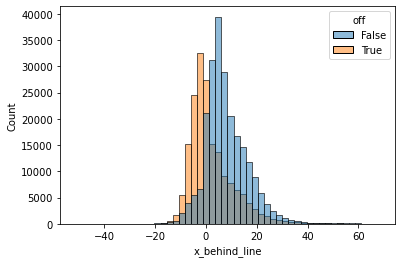

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=week_pos, x='x_behind_line', bins=50, hue='off')

In [210]:
week_pos['yardline_first_dir'] = np.where(week_pos['off_pos'] == 'right',
                                          week_pos['yardline_first'],
                                          week_pos['yardline_first'].rsub(100))
week_pos['yardline_100_dir'] = np.where(week_pos['off_pos'] == 'right',
                                        week_pos['yardline_100'],
                                        week_pos['yardline_100'].rsub(100))

In [211]:
week_pos['yardline_first_dir'].describe()

count    412515.000000
mean         43.613406
std          23.087943
min           0.000000
25%          27.000000
50%          47.000000
75%          64.000000
max          89.000000
Name: yardline_first_dir, dtype: float64

In [212]:
week_pos['yardline_100_dir'].describe()

count    412515.000000
mean         52.688164
std          23.960913
min           1.000000
25%          36.000000
50%          56.000000
75%          72.000000
max          99.000000
Name: yardline_100_dir, dtype: float64

In [213]:
week_pos['exceeded_1yd'] = week_pos.groupby(['gameId', 'playId', 'nflId'])['x_behind_line'].transform(lambda x: x.max() > 1)

In [217]:
week_pos['receiver'] = week_pos['off'] & (week_pos['position'] != ' QB') & (week_pos['exceeded_1yd'] | (week_pos['position'] == 'WR'))

In [218]:
week_pos[week_pos['receiver']]['position'].value_counts()

WR    80941
TE    31961
RB    18067
HB     1418
QB     1140
FB      614
Name: position, dtype: int64

In [221]:
week_pos['yardline_first_dir'].lt(week_pos['yardline_100_dir']).value_counts()

True    412515
dtype: int64

In [224]:
off_pos = week_pos[week_pos['off']]['pos_num'].unique()
def_pos = week_pos[~week_pos['off']]['pos_num'].unique()

In [235]:
week_def_pivot = week_pos.pivot_table(values=['x_behind_line', 'y', 'receiver'],
                     index=['gameId', 'playId', 'time_acc_s', 'DL', 'LB', 'DB',
                            'yardline_first_dir', 'yardline_100_dir', 'defendersInTheBox',
                            'numberOfPassRushers'],
                     columns='pos_num').reset_index()

In [241]:
# Several of the position values are null, which makes sense bc not all positions are utilized in each play.
#

week_def_pivot.iloc[:, week_def_pivot.columns.get_level_values(0) == 'receiver']

receiver                                           ...               \
pos_num      CB0  CB1  CB2 CB3 DB0 DL0  FB0  FS0  FS1 FS2  ... RB2  SS0 SS1   
0            0.0  0.0  NaN NaN NaN NaN  1.0  0.0  0.0 NaN  ... NaN  0.0 NaN   
1            0.0  0.0  NaN NaN NaN NaN  1.0  0.0  0.0 NaN  ... NaN  0.0 NaN   
2            0.0  0.0  NaN NaN NaN NaN  1.0  0.0  0.0 NaN  ... NaN  0.0 NaN   
3            0.0  0.0  NaN NaN NaN NaN  1.0  0.0  0.0 NaN  ... NaN  0.0 NaN   
4            0.0  0.0  NaN NaN NaN NaN  1.0  0.0  0.0 NaN  ... NaN  0.0 NaN   
...          ...  ...  ...  ..  ..  ..  ...  ...  ...  ..  ...  ..  ...  ..   
30132        0.0  0.0  0.0 NaN NaN NaN  NaN  0.0  NaN NaN  ... NaN  0.0 NaN   
30133        0.0  0.0  0.0 NaN NaN NaN  NaN  0.0  NaN NaN  ... NaN  0.0 NaN   
30134        0.0  0.0  0.0 NaN NaN NaN  NaN  0.0  NaN NaN  ... NaN  0.0 NaN   
30135        0.0  0.0  0.0 NaN NaN NaN  NaN  0.0  NaN NaN  ... NaN  0.0 NaN   
30136        0.0  0.0  0.0 NaN NaN NaN  NaN  0.0  NaN NaN  ... NaN  0.0 NaN   

                                         
pos_num  TE0 TE1 TE2  WR0  WR1  WR2 WR3  
0        1.0 NaN NaN  1.0  1.0  NaN NaN  
1        1.0 NaN NaN  1.0  1.0  NaN NaN  
2        1.0 NaN NaN  1.0  1.0  NaN NaN  
3        1.0 NaN NaN  1.0  1.0  NaN NaN  
4        1.0 NaN NaN  1.0  1.0  NaN NaN  
...      ...  ..  ..  ...  ...  ...  ..  
30132    1.0 NaN NaN  1.0  1.0  1.0 NaN  
30133    1.0 NaN NaN  1.0  1.0  1.0 NaN  
30134    1.0 NaN NaN  1.0  1.0  1.0 NaN  
30135    1.0 NaN NaN  1.0  1.0  1.0 NaN  
30136    1.0 NaN NaN  1.0  1.0  1.0 NaN  

[30137 rows x 36 columns]

In [239]:
week_pos['x_behind_line'].min()

-51.459999999999994

In [337]:
def find_min_dist(df1, df2, x_col, y_col):
    arr1 = np.repeat(df1[[x_col, y_col]].values[:, np.newaxis, :], df2.shape[0], axis=1)
    arr2 = np.tile(df2[[x_col, y_col]].values, (df1.shape[0], 1, 1))
    min_dist = np.min(np.sqrt(np.sum(np.power(arr1 - arr2, 2), axis=2)), axis=1)
    return min_dist

In [351]:
receiver_dist = week_pos.groupby(['gameId', 'playId', 'time_acc_s']).apply(lambda x: np.nan if x[x['receiver']].shape[0] == 0 else
    find_min_dist(x[~x['off']], x[x['receiver']], 'x_starting', 'y')).explode().dropna(axis=0)

In [ ]:
receiver_in = week_pos.groupby(['gameId', 'playId', 'time_acc_s']).apply(lambda x: x[x['receiver']].shape[0] != 0)
receiver_in

In [356]:
receiver_dist.shape

(231925,)

In [ ]:
week_pos_def = week_pos[~week_pos['off']]
week_pos_rec = week_pos[week_pos['receiver']]
week_pos_def.groupby(['gameId', 'playId', 'time_acc_s']).apply(lambda x: find_min_dist(x, week_pos_rec, 'x_starting', 'y'))

In [338]:
df1 = pd.DataFrame({'a': range(1, 4), 'b': range(5, 8)})
df2 = pd.DataFrame({'a': range(2, 5), 'b': range(6, 9)})
find_min_dist(df1, df2, 'a', 'b')

array([1.41421356, 0.        , 0.        ])

In [339]:
df1

,a,b
0,1,5
1,2,6
2,3,7


In [340]:
df2

,a,b
0,2,6
1,3,7
2,4,8


In [335]:
np.min(np.sqrt(np.sum(np.power(arr1 - arr2, 2), axis=2)), axis=1)

array([1.41421356, 0.        , 0.        ])

In [328]:
arr1 - arr2

array([[[-1, -1],
        [-2, -2],
        [-3, -3]],

       [[ 0,  0],
        [-1, -1],
        [-2, -2]],

       [[ 1,  1],
        [ 0,  0],
        [-1, -1]]])